In [1]:
from PyPDF2 import PdfFileReader
from wand.image import Image
import fitz

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import os
import easyocr
import pytesseract
import cv2
import pandas as pd
import time

In [2]:
# Input PDF file path
pdf_file_path = '1098C_Samples/Sample 6_1098 C.pdf'

# Output image file path
output_image_path = 'Sample 6_1098 C.png'

# Create a PyMuPDF document and load the PDF
pdf_document = fitz.open(pdf_file_path)

# Render the first page as an image with high quality (DPI)
dpi = 300  # You can adjust the DPI as needed
first_page = pdf_document.load_page(0)
pix = first_page.get_pixmap(matrix=fitz.Matrix(dpi/72, dpi/72))

# Save the image with high quality
pix.save(output_image_path)

# Close the PDF document
pdf_document.close()

print(f'Conversion of the first page to {output_image_path} completed.')

Conversion of the first page to Sample 6_1098 C.png completed.


In [7]:
def angle_cos(self,p0, p1, p2):
        d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
        return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

def find_squares(output_image_path):
    img = cv2.imread(output_image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    squares = []

    # Blur the image and Apply thresholding to enhance contrast
    blur = cv2.GaussianBlur(gray, (1, 1), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


    contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        rect = cv2.boundingRect(cnt)
        if rect[2] < 15 or rect[3] < 15:
            continue

        x, y, w, h = rect
        area = w * h
        if area > 25000 and area < 1000000:
            squares.append(cnt) 

    print(f"Squares Detection Succesfull with Count: {len(squares)}")
    return squares

Squares Detection Succesfull with Count: 23


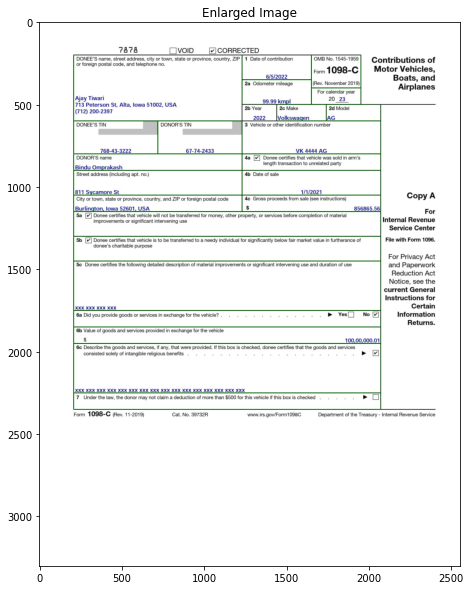

In [9]:
img = cv2.imread('Sample 6_1098 C.png')

squares = find_squares('Sample 6_1098 C.png')
cv2.drawContours(img, squares, -1, (0, 255, 0), 1)

# Create a larger figure size
plt.figure(figsize=(15, 10))  # Adjust the width and height as needed
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Add a title (optional)
plt.title("Enlarged Image")

# Display the image
plt.show()

In [10]:
len(squares)

23

In [15]:
def final_contour_data_extraction(output_image_path,grouped_squares):
    start_time = time.time()
    image = cv2.imread(output_image_path)
    data = []


    for i, contour in enumerate(grouped_squares):

        # Get the bounding box of the contour
        x, y, w, h = cv2.boundingRect(contour)

        coord_dict = {}
        coord_dict['coordinates'] = (y, y + h, x, x + w)

        # Crop the image based on the bounding box
        cropped_image = image[y:y + h, x:x + w]


        #Optional: Display the image with its centroid for verification
        plt.figure(figsize=(10, 10))
        plt.imshow(cropped_image)
        plt.show()
        
        text = pytesseract.image_to_string(cropped_image, lang='eng',config = "--psm 6")
        
        print(text)
        coord_dict['text'] = text
        data.append(coord_dict)


    print("Text extraction completed.")
    end_time = time.time()
    print(f"Elapsed Time: {end_time - start_time}")
    return data

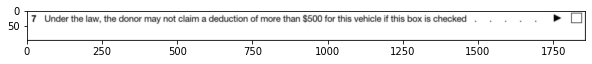

7 Under the law, the donor may not claim a deduction of more than $500 for this vehicle if thisboxischecked . . . . . > C]



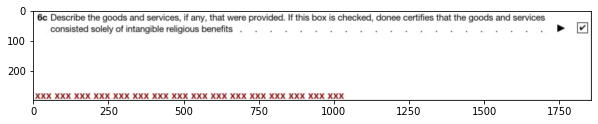

6c Describe the goods and services, if any, that were provided. If this box is checked, donee certifies that the goods and services
consisted solely of intangible religious benefits ©. 2. 2... ke
XXX XXX XXX XXK XXK XXX XXX XXX XXK XXX XXX XXX XXX XXK XXX XXK



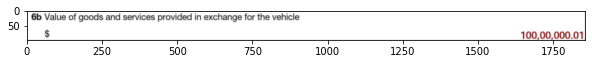

6b Value of goods and services provided in exchange for the vehicle
$ 100,00,000.01



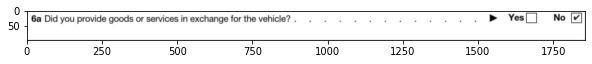

6a Did you provide goods or services in exchange forthe vehicle?. . . . . . . . . . . Oe Yes[_]_ No



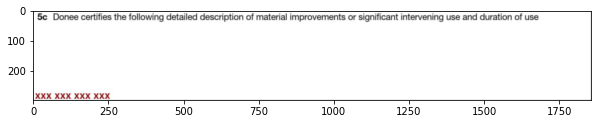

5c Donee certifies the following detailed description of material improvements or significant intervening use and duration of use
XXX XXX XXX XXX



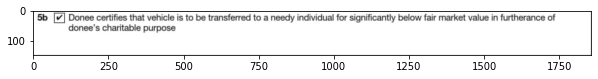

5b Donee certifies that vehicle is to be transferred to a needy individual for significantly below fair market value in furtherance of
donee’s charitable purpose



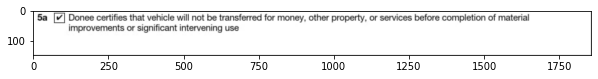

5a Donee certifies that vehicle will not be transferred for money, other property, or services before completion of material
improvements or significant intervening use



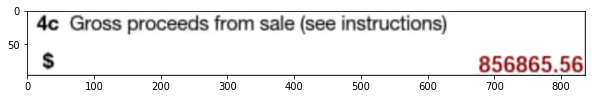

4c Gross proceeds from sale (see instructions)
$ 856865.56



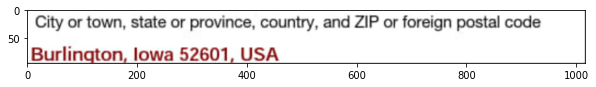

City or town, state or province, country, and ZIP or foreign postal code
Burlington, lowa 52601, USA



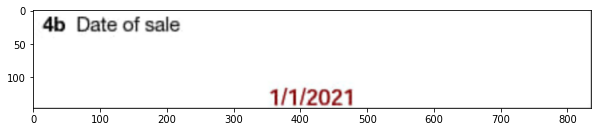

4b Date of sale
1/1/2021



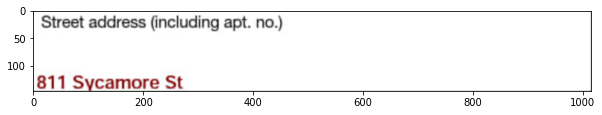

Street address (including apt. no.)
811 Sycamore St



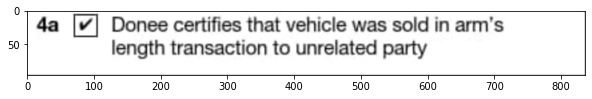

da Donee certifies that vehicle was sold in arm's
length transaction to unrelated party



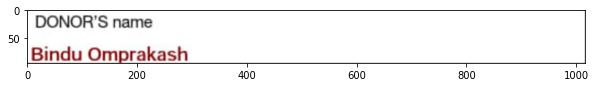

Bindu Omprakash



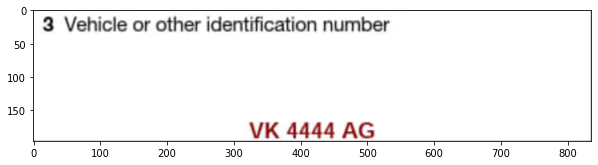

3 Vehicle or other identification number
VK 4444 AG



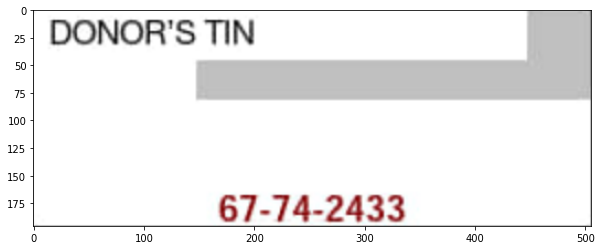

67-74-2433



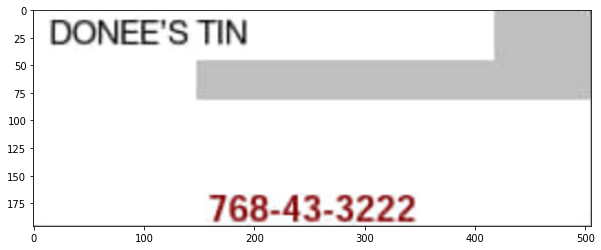

768-43-3222



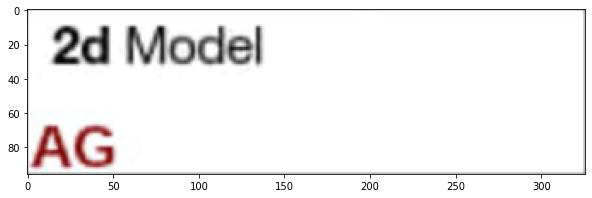

2d Model
AG



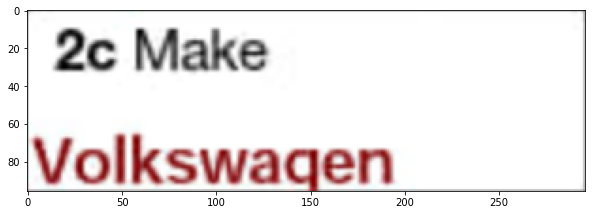

2c Make
Volkswaqden



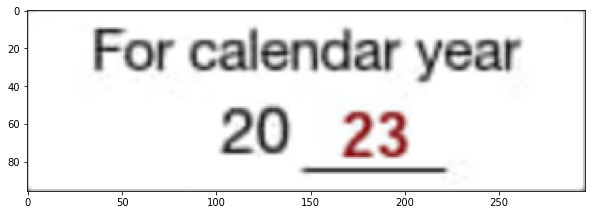

For calendar year
20 23



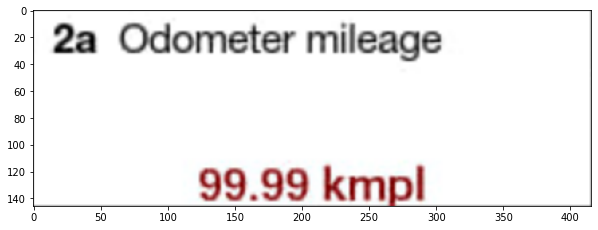

2a Odometer mileage
99.99 kmpl



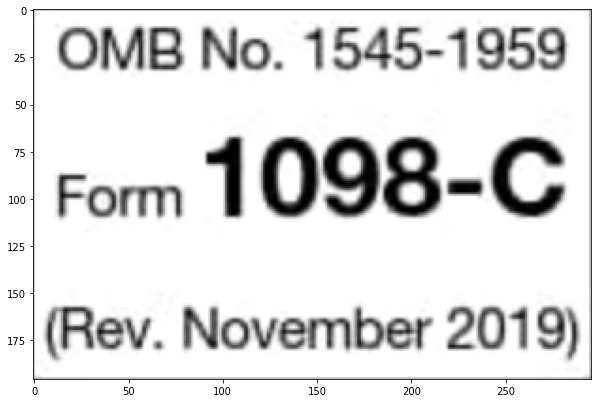

OMB No. 1545-1959
Form 1 098-C
(Rev. November 2019)



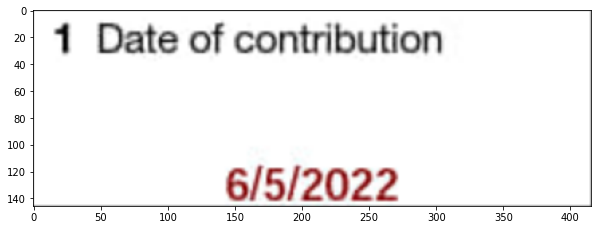

1 Date of contribution
6/5/2022



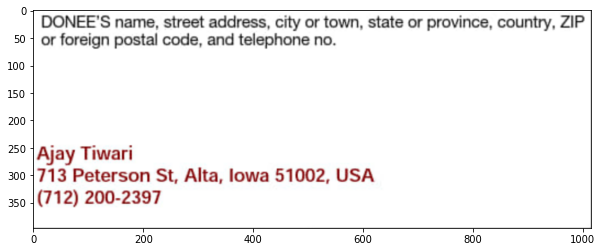

DONEE'’S name, street address, city or town, state or province, country, ZIP
or foreign postal code, and telephone no.

Ajay Tiwari

713 Peterson St, Alta, lowa 51002, USA

(712) 200-2397

Text extraction completed.
Elapsed Time: 22.67492127418518


In [16]:
data = final_contour_data_extraction('Sample 6_1098 C.png',squares)